In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../artifacts/sentiment_analysis.csv')

In [3]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [4]:
data.sample(6)

,id,label,tweet
2148,2149,0,I #LOvE #retweeting. It's the #bomb. The #NFL ...
7016,7017,0,Wow mommy! They gift mom samsung galaxy tab. P...
4070,4071,0,Just ordered this #amazing #photo as my #new #...
7244,7245,1,When your headphones just aren't loud enough #...
4364,4365,0,"Hunff #iphonesia, #iphone, #instagood, #instag..."
4914,4915,0,having to chill on the floor just to charge my...


In [5]:
data.shape

(7920, 3)

In [7]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7915    False
7916    False
7917    False
7918    False
7919    False
Length: 7920, dtype: bool

In [8]:
data.duplicated().sum()

0

In [9]:
data.isnull()

,id,label,tweet
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
7915,False,False,False
7916,False,False,False
7917,False,False,False
7918,False,False,False


In [11]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [12]:
import re
import string

In [13]:
data["tweet"].head(10)

0    #fingerprint #Pregnancy Test https://goo.gl/h1...
1    Finally a transparant silicon case ^^ Thanks t...
2    We love this! Would you go? #talk #makememorie...
3    I'm wired I know I'm George I was made that wa...
4    What amazing service! Apple won't even talk to...
5    iPhone software update fucked up my phone big ...
6    Happy for us .. #instapic #instadaily #us #son...
7    New Type C charger cable #UK http://www.ebay.c...
8    Bout to go shopping again listening to music #...
9    Photo: #fun #selfie #pool #water #sony #camera...
Name: tweet, dtype: object

In [14]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [15]:
data["tweet"].head(10)

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
5    iphone software update fucked up my phone big ...
6    happy for us .. #instapic #instadaily #us #son...
7    new type c charger cable #uk http://www.ebay.c...
8    bout to go shopping again listening to music #...
9    photo: #fun #selfie #pool #water #sony #camera...
Name: tweet, dtype: object

In [18]:
data["tweet"] = data['tweet'].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE) for x in x.split()))

In [19]:
data["tweet"].head(10)

0    #fingerprint #pregnancy test  #android #apps #...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
5    iphone software update fucked up my phone big ...
6    happy for us .. #instapic #instadaily #us #son...
7    new type c charger cable #uk  … #bay #amazon #...
8    bout to go shopping again listening to music #...
9    photo: #fun #selfie #pool #water #sony #camera...
Name: tweet, dtype: object

In [20]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

data["tweet"] = data["tweet"].apply(remove_punctuations)

In [21]:
data["tweet"].head(10)

0    fingerprint pregnancy test  android apps beaut...
1    finally a transparant silicon case  thanks to ...
2    we love this would you go talk makememories un...
3    im wired i know im george i was made that way ...
4    what amazing service apple wont even talk to m...
5    iphone software update fucked up my phone big ...
6    happy for us  instapic instadaily us sony xper...
7    new type c charger cable uk  … bay amazon etsy...
8    bout to go shopping again listening to music i...
9    photo fun selfie pool water sony camera picoft...
Name: tweet, dtype: object

In [22]:
data["tweet"].tail(10)

7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app  mobi...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely 90 year old neighbor with he...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

In [23]:
 data["tweet"] = data['tweet'].str.replace('\d+', '', regex=True)

In [24]:
data["tweet"].tail(10)

7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app  mobi...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely  year old neighbor with her ...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

In [25]:
data.head(10)

,id,label,tweet
0,1,0,fingerprint pregnancy test android apps beaut...
1,2,0,finally a transparant silicon case thanks to ...
2,3,0,we love this would you go talk makememories un...
3,4,0,im wired i know im george i was made that way ...
4,5,1,what amazing service apple wont even talk to m...
5,6,1,iphone software update fucked up my phone big ...
6,7,0,happy for us instapic instadaily us sony xper...
7,8,0,new type c charger cable uk … bay amazon etsy...
8,9,0,bout to go shopping again listening to music i...
9,10,0,photo fun selfie pool water sony camera picoft...


In [26]:
data.sample(20)

,id,label,tweet
2850,2851,0,and pamela neighbours in love jeanne and pamel...
2093,2094,1,i actually spent minutes waiting for a progra...
1875,1876,0,miniature zoo zoo animal d enjoy ar arkit augm...
1307,1308,0,why is my imessage not working now either so m...
7118,7119,0,a cruise through the alps in switzerland switz...
1924,1925,0,chorizo apple sausage roll i made this nice pa...
6097,6098,1,hate that im out gotta wait til im home to get...
4672,4673,0,going to see my uncle for his birthday new ju...
311,312,1,why cant iphones have the option to change the...
7636,7637,0,bought myself a gift macbookair mba apple gift...


In [27]:
pip install nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 2.1 MB/s eta 0:00:000:00:010:00:01:01
  Obtaining dependency information for click from https://files.pythonhosted.org/packages/1a/70/e63223f8116931d365993d4a6b7ef653a4d920b41d03de7c59499962821f/click-8.1.6-py3-none-any.whl.metadata
  Obtaining dependency information for joblib from https://files.pythonhosted.org/packages/10/40/d551139c85db202f1f384ba8bcf96aca2f329440a844f924c8a0040b6d02/joblib-1.3.2-py3-none-any.whl.metadata
  Obtaining dependency information for regex>=2021.8.3 from https://files.pythonhosted.org/packages/03/5e/9a4cabe86a3b4e67bd2cf795a2e84de01c735c8c1c1d88795425847ccbbe/regex-2023.8.8-cp311-cp311-macosx_11_0_arm64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.3/289.3 kB 1.1 MB/s eta 0:00:00 MB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 2.5 MB/s eta 0:00:003.3 MB/s eta 0:00:01
   ━━━━━━━

In [10]:
import nltk

In [11]:
nltk.download('stopwords', download_dir='../static/model')

[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1002)>


False

In [40]:
with open('../static/model/corpora/stopwords/english', 'r') as file:
    sw = file.read().splitlines()

In [41]:
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [42]:
data.head(5)

,id,label,tweet
0,1,0,fingerprint pregnancy test android apps beaut...
1,2,0,finally a transparant silicon case thanks to ...
2,3,0,we love this would you go talk makememories un...
3,4,0,im wired i know im george i was made that way ...
4,5,1,what amazing service apple wont even talk to m...


In [43]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [44]:
data.head(5)

,id,label,tweet
0,1,0,fingerprint pregnancy test android apps beauti...
1,2,0,finally transparant silicon case thanks uncle ...
2,3,0,love would go talk makememories unplug relax i...
3,4,0,im wired know im george made way iphone cute d...
4,5,1,amazing service apple wont even talk question ...


In [45]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [46]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

In [47]:
data.head(5)

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...


In [1]:
from collections import Counter
vocab = Counter()

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
data = pd.read_csv('../artifacts/sentiment_analysis.csv')

In [8]:
for sentence in data['tweet']:
    print(sentence)

#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone
Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/
We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu
I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/
What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!
iPhone software update fucked up my phone big time Stupid iPhones
Happy for us .. #instapic #instadaily #us #sony #xperia #xperiaZ https://instagram.com/p/z9qGfWlvj7/
New Type C charger cable #UK http://www.ebay.co.uk/itm/-/112598674021 … #bay #Amazon #etsy New Year #Rob Cross #Toby Young #EVEMUN #McMafia #Taylor #SPECTRE 2018 #NewYear #Starting 2018 #recipes #technology #Sa

In [9]:
import re
import string

In [12]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [13]:
data["tweet"] = data['tweet'].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE) for x in x.split()))

In [14]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

data["tweet"] = data["tweet"].apply(remove_punctuations)

In [15]:
data["tweet"] = data['tweet'].str.replace('\d+', '', regex=True)

In [16]:
import nltk

In [17]:
with open('../static/model/corpora/stopwords/english', 'r') as file:
    sw = file.read().splitlines()

In [18]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [19]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [20]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

In [21]:
from collections import Counter
vocab = Counter()

In [22]:
for sentence in data['tweet']:
    print(sentence)

fingerprint pregnanc test android app beauti cute health iger iphoneonli iphonesia iphon
final transpar silicon case thank uncl yay soni xperia sonyexperias…
love would go talk makememori unplug relax iphon smartphon wifi connect
im wire know im georg made way iphon cute daventri home
amaz servic appl wont even talk question unless pay stupid support
iphon softwar updat fuck phone big time stupid iphon
happi us instap instadaili us soni xperia xperiaz
new type c charger cabl uk … bay amazon etsi new year rob cross tobi young evemun mcmafia taylor spectr newyear start recip technolog samsunggalaxi iphonex pictwittercompjiwqwtc
bout go shop listen music iphon justm music likeforlik followforfollow…
photo fun selfi pool water soni camera picoftheday sun instagood boy cute outdoor
hey appl make new ipod dont make new color inch thinner make crash everi five fuckin minit
ha heavi machineri need appl realli drop ball design drinkyourhaterad
contempl give iphon bandwagon simpli cellcom new an

In [23]:
for sentence in data['tweet']:
    vocab.update(sentence.split())

In [24]:
vocab

Counter({'iphon': 4073,
         'appl': 2876,
         'samsung': 1395,
         'new': 1137,
         'phone': 1015,
         'follow': 885,
         'soni': 819,
         '…': 751,
         'ipad': 537,
         'rt': 525,
         'love': 499,
         'like': 455,
         'day': 426,
         'app': 416,
         'life': 415,
         'android': 414,
         'photo': 394,
         'get': 382,
         'io': 382,
         'galaxi': 361,
         'instagram': 358,
         'case': 348,
         'beauti': 322,
         'cute': 322,
         'gain': 311,
         'today': 309,
         'work': 306,
         'im': 294,
         'back': 294,
         'fuck': 293,
         'happi': 293,
         'photographi': 292,
         'game': 282,
         'got': 280,
         'fun': 277,
         'news': 265,
         'thank': 263,
         'music': 263,
         'time': 248,
         'make': 247,
         'updat': 236,
         'smile': 231,
         'instagood': 226,
         'funni': 223,
   

In [25]:
len(vocab)

15949

In [26]:
tokens = [key for key in vocab if vocab[key] > 10]

In [27]:
tokens

['test',
 'android',
 'app',
 'beauti',
 'cute',
 'health',
 'iger',
 'iphoneonli',
 'iphonesia',
 'iphon',
 'final',
 'case',
 'thank',
 'yay',
 'soni',
 'xperia',
 'love',
 'would',
 'go',
 'talk',
 'relax',
 'smartphon',
 'wifi',
 'connect',
 'im',
 'know',
 'made',
 'way',
 'home',
 'amaz',
 'servic',
 'appl',
 'wont',
 'even',
 'question',
 'pay',
 'stupid',
 'support',
 'softwar',
 'updat',
 'fuck',
 'phone',
 'big',
 'time',
 'happi',
 'us',
 'instap',
 'instadaili',
 'xperiaz',
 'new',
 'type',
 'c',
 'charger',
 'cabl',
 'uk',
 '…',
 'amazon',
 'year',
 'newyear',
 'start',
 'technolog',
 'samsunggalaxi',
 'iphonex',
 'shop',
 'listen',
 'music',
 'likeforlik',
 'photo',
 'fun',
 'selfi',
 'water',
 'camera',
 'picoftheday',
 'sun',
 'instagood',
 'boy',
 'outdoor',
 'hey',
 'make',
 'ipod',
 'dont',
 'color',
 'inch',
 'crash',
 'everi',
 'need',
 'realli',
 'drop',
 'ball',
 'design',
 'give',
 'anoth',
 'crazi',
 'purchas',
 'lol',
 'work',
 'hard',
 'play',
 'ipad',
 'batt

In [28]:
len(tokens)

1145

In [29]:
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w', encoding="utf-8")
    file.write(data)
    file.close()

save_vocabulary(tokens, '../static/model/vocabulary.txt')

In [31]:
data

,id,label,tweet
0,1,0,fingerprint pregnanc test android app beauti c...
1,2,0,final transpar silicon case thank uncl yay son...
2,3,0,love would go talk makememori unplug relax iph...
3,4,0,im wire know im georg made way iphon cute dave...
4,5,1,amaz servic appl wont even talk question unles...
...,...,...,...
7915,7916,0,live loud lol liveoutloud selfi smile soni mus...
7916,7917,0,would like wish amaz day make everi minut coun...
7917,7918,0,help love year old neighbor ipad morn made rea...
7918,7919,0,final got smart pocket wifi stay connect anyti...


In [36]:
x = data['tweet']
y = data['label']

In [37]:
x

0       fingerprint pregnanc test android app beauti c...
1       final transpar silicon case thank uncl yay son...
2       love would go talk makememori unplug relax iph...
3       im wire know im georg made way iphon cute dave...
4       amaz servic appl wont even talk question unles...
                              ...                        
7915    live loud lol liveoutloud selfi smile soni mus...
7916    would like wish amaz day make everi minut coun...
7917    help love year old neighbor ipad morn made rea...
7918    final got smart pocket wifi stay connect anyti...
7919    appl barcelona appl store bcn barcelona travel...
Name: tweet, Length: 7920, dtype: object

In [38]:
y

0       0
1       0
2       0
3       0
4       1
       ..
7915    0
7916    0
7917    0
7918    0
7919    0
Name: label, Length: 7920, dtype: int64

In [39]:
!pip install scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/18/36/60b58b6199547b7b46be03e05508d053162fbce146639bfc65609fa49b23/scikit_learn-1.3.0-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Obtaining dependency information for scipy>=1.5.0 from https://files.pythonhosted.org/packages/db/8d/6419a5a65a538791f49d52cd8f8883bd11b41df0c9d35f500c9650f1e0b7/scipy-1.11.1-cp311-cp311-macosx_12_0_arm64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 41.7 kB/s eta 0:00:0031m34.3 kB/s eta 0:00:01
  Obtaining dependency information for threadpoolctl>=2.0.0 from https://files.pythonhosted.org/packages/81/12/fd4dea011af9d69e1cad05c75f3f7202cdcbeac9b712eea58ca779a72865/threadpoolctl-3.2.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 423.9 kB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.5/29.5 MB 1.4 MB/s eta 0:00:00m eta 0:00:010:00:010m


In [40]:
X = data['tweet']
y = data['label']

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [46]:
X_train

3972    emerg alert realli get old second time scare c...
3878    samsungmobileu samsung thank updat full screen...
2016    headphon brigadabeats​​ background write pain ...
6109    good morn barcelona juic fresh appl carrot gin...
5466    thank amazon free ps game amazon custom preord...
                              ...                        
3872    charg devic wirelessli avail store samsung sam...
1002            miisstoriix overr wast money get abus lol
6799    ♪httpwwwyoutubecomwatchvrcxahxbum … japan 音楽 舞...
1783    beauti day realli fun nx samsung nx fun sunni ...
1574    new snapchat updat confus hayyyllll least got ...
Name: tweet, Length: 6336, dtype: object

In [47]:
def vectorizer(ds, vocabulary):
    vectorized_lst = []
    
    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))
        
        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i] = 1
                
        vectorized_lst.append(sentence_lst)
        
    vectorized_lst_new = np.asarray(vectorized_lst, dtype=np.float32)
    
    return vectorized_lst_new

In [48]:
vectorized_x_train = vectorizer(X_train, tokens)

In [49]:
vectorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [50]:
vectorized_x_test = vectorizer(X_test, tokens)

In [51]:
vectorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [52]:
y_train.value_counts()

label
0    4697
1    1639
Name: count, dtype: int64

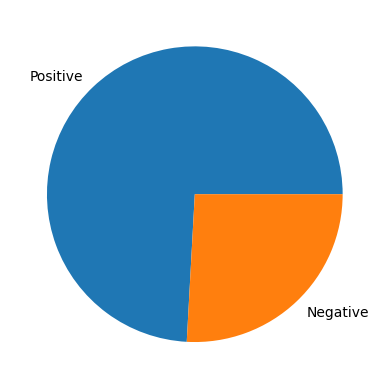

In [53]:
plt.pie(np.array([y_train.value_counts()[0], y_train.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

In [54]:
!pip install imbalanced-learn

  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/a3/9e/fbe60a768502af54563dcb59ca7856f5a8833b3ad5ada658922e1ab09b7f/imbalanced_learn-0.11.0-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 904.5 kB/s eta 0:00:00 kB/s eta 0:00:01:01


In [55]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)
print(vectorized_x_train_smote.shape, y_train_smote.shape)

(9394, 1145) (9394,)


In [56]:
y_train_smote.value_counts()

label
1    4697
0    4697
Name: count, dtype: int64

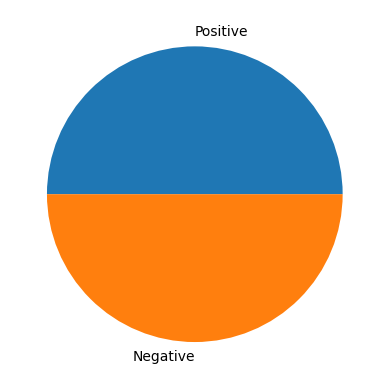

In [57]:
plt.pie(np.array([y_train_smote.value_counts()[0], y_train_smote.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [59]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')
    
def validation_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pr = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Testing Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall = {rec}\n\tF1-Score = {f1}')

In [60]:
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = lr.predict(vectorized_x_train_smote)

y_test_pred = lr.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.936
	Precision = 0.911
	Recall = 0.966
	F1-Score = 0.938
Testing Scores:
	Accuracy = 0.889
	Precision = 0.733
	Recall = 0.858
	F1-Score = 0.79


In [61]:
mnb = MultinomialNB()
mnb.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = mnb.predict(vectorized_x_train_smote)

y_test_pred = mnb.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.906
	Precision = 0.868
	Recall = 0.957
	F1-Score = 0.91
Testing Scores:
	Accuracy = 0.878
	Precision = 0.687
	Recall = 0.92
	F1-Score = 0.787


In [62]:
dt = DecisionTreeClassifier()

dt.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = dt.predict(vectorized_x_train_smote)

y_test_pred = dt.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.834
	Precision = 0.665
	Recall = 0.646
	F1-Score = 0.655


In [67]:
rf = RandomForestClassifier()

rf.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = rf.predict(vectorized_x_train_smote)

y_test_pred = rf.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall = 1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.874
	Precision = 0.744
	Recall = 0.736
	F1-Score = 0.74


In [68]:
svm = SVC()

svm.fit(vectorized_x_train_smote, y_train_smote)

y_train_pred = svm.predict(vectorized_x_train_smote)

y_test_pred = svm.predict(vectorized_x_test)

training_scores(y_train_smote, y_train_pred)

validation_scores(y_test, y_test_pred)

Training Scores:
	Accuracy = 0.977
	Precision = 0.961
	Recall = 0.996
	F1-Score = 0.978
Testing Scores:
	Accuracy = 0.893
	Precision = 0.762
	Recall = 0.819
	F1-Score = 0.79


In [69]:
import pickle

with open('../static/model/model.pickle', 'wb') as file:
    pickle.dump(lr, file)